### Analysis: COVID numbers provided by John Hopkins University
- Data source: https://github.com/CSSEGISandData

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

sns.set()
rcParams['font.family'] = 'DejaVu Sans'
pd.options.display.max_columns = 500
pd.options.display.max_rows = 1000

In [2]:
us_confirmed_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
us_deaths_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv'

confirmed_df = pd.read_csv(us_confirmed_url)
deaths_df = pd.read_csv(us_deaths_url)

# Drop non-state entities
non_states = ['American Samoa', 'Diamond Princess', 'District of Columbia', 'Grand Princess', 'Guam', 'Northern Mariana Islands', 'Puerto Rico', 'Virgin Islands']
confirmed_df = confirmed_df[~confirmed_df['Province_State'].isin(non_states)]
deaths_df = deaths_df[~deaths_df['Province_State'].isin(non_states)]

In [3]:
print(confirmed_df.shape)
confirmed_df.head()

(3251, 137)


UID iso2 iso3  code3    FIPS   Admin2 Province_State Country_Region  \
5  84001001   US  USA    840  1001.0  Autauga        Alabama             US   
6  84001003   US  USA    840  1003.0  Baldwin        Alabama             US   
7  84001005   US  USA    840  1005.0  Barbour        Alabama             US   
8  84001007   US  USA    840  1007.0     Bibb        Alabama             US   
9  84001009   US  USA    840  1009.0   Blount        Alabama             US   

         Lat      Long_          Combined_Key  1/22/20  1/23/20  1/24/20  \
5  32.539527 -86.644082  Autauga, Alabama, US        0        0        0   
6  30.727750 -87.722071  Baldwin, Alabama, US        0        0        0   
7  31.868263 -85.387129  Barbour, Alabama, US        0        0        0   
8  32.996421 -87.125115     Bibb, Alabama, US        0        0        0   
9  33.982109 -86.567906   Blount, Alabama, US        0        0        0   

   1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  1/30/20  1/31/20  2/1/20  \
5        0        0        0        0        0        0        0       0   
6        0        0        0        0        0        0        0       0   
7        0        0        0        0        0        0        0       0   
8        0        0        0        0        0        0        0       0   
9        0        0        0        0        0        0        0       0   

   2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  2/8/20  2/9/20  2/10/20  \
5       0       0       0       0       0       0       0       0        0   
6       0       0       0       0       0       0       0       0        0   
7       0       0       0       0       0       0       0       0        0   
8       0       0       0       0       0       0       0       0        0   
9       0       0       0       0       0       0       0       0        0   

   2/11/20  2/12/20  2/13/20  2/14/20  2/15/20  2/16/20  2/17/20  2/18/20  \
5        0        0        0        0        0        0        0        0   
6        0        0        0        0        0        0        0        0   
7        0        0        0        0        0        0        0        0   
8        0        0        0        0        0        0        0        0   
9        0        0        0        0        0        0        0        0   

   2/19/20  2/20/20  2/21/20  2/22/20  2/23/20  2/24/20  2/25/20  2/26/20  \
5        0        0        0        0        0        0        0        0   
6        0        0        0        0        0        0        0        0   
7        0        0        0        0        0        0        0        0   
8        0        0        0        0        0        0        0        0   
9        0        0        0        0        0        0        0        0   

   2/27/20  2/28/20  2/29/20  3/1/20  3/2/20  3/3/20  3/4/20  3/5/20  3/6/20  \
5        0        0        0       0       0       0       0       0       0   
6        0        0        0       0       0       0       0       0       0   
7        0        0        0       0       0       0       0       0       0   
8        0        0        0       0       0       0       0       0       0   
9        0        0        0       0       0       0       0       0       0   

   3/7/20  3/8/20  3/9/20  3/10/20  3/11/20  3/12/20  3/13/20  3/14/20  \
5       0       0       0        0        0        0        0        0   
6       0       0       0        0        0        0        0        0   
7       0       0       0        0        0        0        0        0   
8       0       0       0        0        0        0        0        0   
9       0       0       0        0        0        0        0        0   

   3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  3/20/20  3/21/20  3/22/20  \
5        0        0        0        0        0        0        0        0   
6        1        1        1        1        1        2        2        2   
7        0        0        0        0        0        0        0   

In [4]:
print(deaths_df.shape)
deaths_df.head()

(3251, 138)


UID iso2 iso3  code3    FIPS   Admin2 Province_State Country_Region  \
5  84001001   US  USA    840  1001.0  Autauga        Alabama             US   
6  84001003   US  USA    840  1003.0  Baldwin        Alabama             US   
7  84001005   US  USA    840  1005.0  Barbour        Alabama             US   
8  84001007   US  USA    840  1007.0     Bibb        Alabama             US   
9  84001009   US  USA    840  1009.0   Blount        Alabama             US   

         Lat      Long_          Combined_Key  Population  1/22/20  1/23/20  \
5  32.539527 -86.644082  Autauga, Alabama, US       55869        0        0   
6  30.727750 -87.722071  Baldwin, Alabama, US      223234        0        0   
7  31.868263 -85.387129  Barbour, Alabama, US       24686        0        0   
8  32.996421 -87.125115     Bibb, Alabama, US       22394        0        0   
9  33.982109 -86.567906   Blount, Alabama, US       57826        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  1/30/20  1/31/20  \
5        0        0        0        0        0        0        0        0   
6        0        0        0        0        0        0        0        0   
7        0        0        0        0        0        0        0        0   
8        0        0        0        0        0        0        0        0   
9        0        0        0        0        0        0        0        0   

   2/1/20  2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  2/8/20  2/9/20  \
5       0       0       0       0       0       0       0       0       0   
6       0       0       0       0       0       0       0       0       0   
7       0       0       0       0       0       0       0       0       0   
8       0       0       0       0       0       0       0       0       0   
9       0       0       0       0       0       0       0       0       0   

   2/10/20  2/11/20  2/12/20  2/13/20  2/14/20  2/15/20  2/16/20  2/17/20  \
5        0        0        0        0        0        0        0        0   
6        0        0        0        0        0        0        0        0   
7        0        0        0        0        0        0        0        0   
8        0        0        0        0        0        0        0        0   
9        0        0        0        0        0        0        0        0   

   2/18/20  2/19/20  2/20/20  2/21/20  2/22/20  2/23/20  2/24/20  2/25/20  \
5        0        0        0        0        0        0        0        0   
6        0        0        0        0        0        0        0        0   
7        0        0        0        0        0        0        0        0   
8        0        0        0        0        0        0        0        0   
9        0        0        0        0        0        0        0        0   

   2/26/20  2/27/20  2/28/20  2/29/20  3/1/20  3/2/20  3/3/20  3/4/20  3/5/20  \
5        0        0        0        0       0       0       0       0       0   
6        0        0        0        0       0       0       0       0       0   
7        0        0        0        0       0       0       0       0       0   
8        0        0        0        0       0       0       0       0       0   
9        0        0        0        0       0       0       0       0       0   

   3/6/20  3/7/20  3/8/20  3/9/20  3/10/20  3/11/20  3/12/20  3/13/20  \
5       0       0       0       0        0        0        0        0   
6       0       0       0       0        0        0        0        0   
7       0       0       0       0        0        0        0        0   
8       0       0       0       0        0        0        0        0   
9       0       0       0       0        0        0        0        0   

   3/14/20  3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  3/20/20  3/21/20  \
5        0        0        0        0        0        0        0        0   
6        0        0        0        0        0        0        0        0   
7        0        0        0        0        0   

Deaths dataset contains extra column for `Population`

In [5]:
# Aggregate across states to get total count for each date
grouped_confirmed = confirmed_df.groupby('Province_State')[confirmed_df.columns].sum().reset_index()
grouped_deaths = deaths_df.groupby('Province_State')[confirmed_df.columns].sum().reset_index()
dates = list(confirmed_df.columns[11:].values)    # Skip first date

In [6]:
grouped_confirmed.head()
# grouped_confirmed

Province_State         UID  code3      FIPS          Lat        Long_  \
0        Alabama  5796241491  57960  241491.0  2203.246784 -5809.578199   
1         Alaska  2604232344  26040  232344.0  1747.579877 -4229.319334   
2        Arizona  1428230216  14280  230216.0   505.138555 -1671.948482   
3       Arkansas  6468550635  64680  550635.0  2618.391704 -6932.548370   
4     California  5040521376  50400  521376.0  2194.949775 -7002.258461   

   1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        1        1        1        1   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        2        2        2        2   

   1/30/20  1/31/20  2/1/20  2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  \
0        0        0       0       0       0       0       0       0       0   
1        0        0       0       0       0       0       0       0       0   
2        1        1       1       1       1       1       1       1       1   
3        0        0       0       0       0       0       0       0       0   
4        2        3       3       3       6       6       6       6       6   

   2/8/20  2/9/20  2/10/20  2/11/20  2/12/20  2/13/20  2/14/20  2/15/20  \
0       0       0        0        0        0        0        0        0   
1       0       0        0        0        0        0        0        0   
2       1       1        1        1        1        1        1        1   
3       0       0        0        0        0        0        0        0   
4       6       6        6        7        7        8        8        8   

   2/16/20  2/17/20  2/18/20  2/19/20  2/20/20  2/21/20  2/22/20  2/23/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        1        1        1        1        1        1        1        1   
3        0        0        0        0        0        0        0        0   
4        8        8        8        8        8       10       10       10   

   2/24/20  2/25/20  2/26/20  2/27/20  2/28/20  2/29/20  3/1/20  3/2/20  \
0        0        0        0        0        0        0       0       0   
1        0        0        0        0        0        0       0       0   
2        1        1        1        1        1        1       1       1   
3        0        0        0        0        0        0       0       0   
4       10       10       10       11       11       12      12      21   

   3/3/20  3/4/20  3/5/20  3/6/20  3/7/20  3/8/20  3/9/20  3/10/20  3/11/20  \
0       0       0       0       0       0       0       0        0        0   
1       0       0       0       0       0       0       0        0        0   
2       1       1       1       2       4       4       4        6        9   
3       0       0       0       0       0       0       0        0        0   
4      25      35      51      59      81      95     101      144      178   

   3/12/20  3/13/20  3/14/20  3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  \
0        0        5        7       11       29       39       51       78   
1        0        1        1        1        1        3        5        8   
2        9        9       12       12       18       20       27       45   
3        0        9       12        3        3        3        4       62   
4      221      281      372      373      557      700      828     1005   

   3/20/20  3/21/20  3/22/20  3/23/20  3/24/20  3/25/20  3/26/20  3/27/20  \
0      106      131      157      196      242      381      517      587   
1       11       13       18       30       34       41       56       58   
2       68      104      152      235      326      401      508      665   
3 

In [7]:
dates = list(confirmed_df.columns[50:].values)    # Start from March 1

# Calculate number of new cases per day
daily_counts_confirmed = grouped_confirmed[dates].diff(axis=1)
daily_counts_deaths = grouped_deaths[dates].diff(axis=1)

# Calculate 7 day rolling average
rolling_avg_confirmed = daily_counts_confirmed[dates].rolling(7, axis=1).mean()
rolling_avg_deaths = daily_counts_deaths[dates].rolling(7, axis=1).mean()

# Add back state/province names
names = grouped_confirmed['Province_State'].values
daily_counts_confirmed['Province_State'] = names
daily_counts_deaths['Province_State'] = names
rolling_avg_confirmed['Province_State'] = names
rolling_avg_deaths['Province_State'] = names

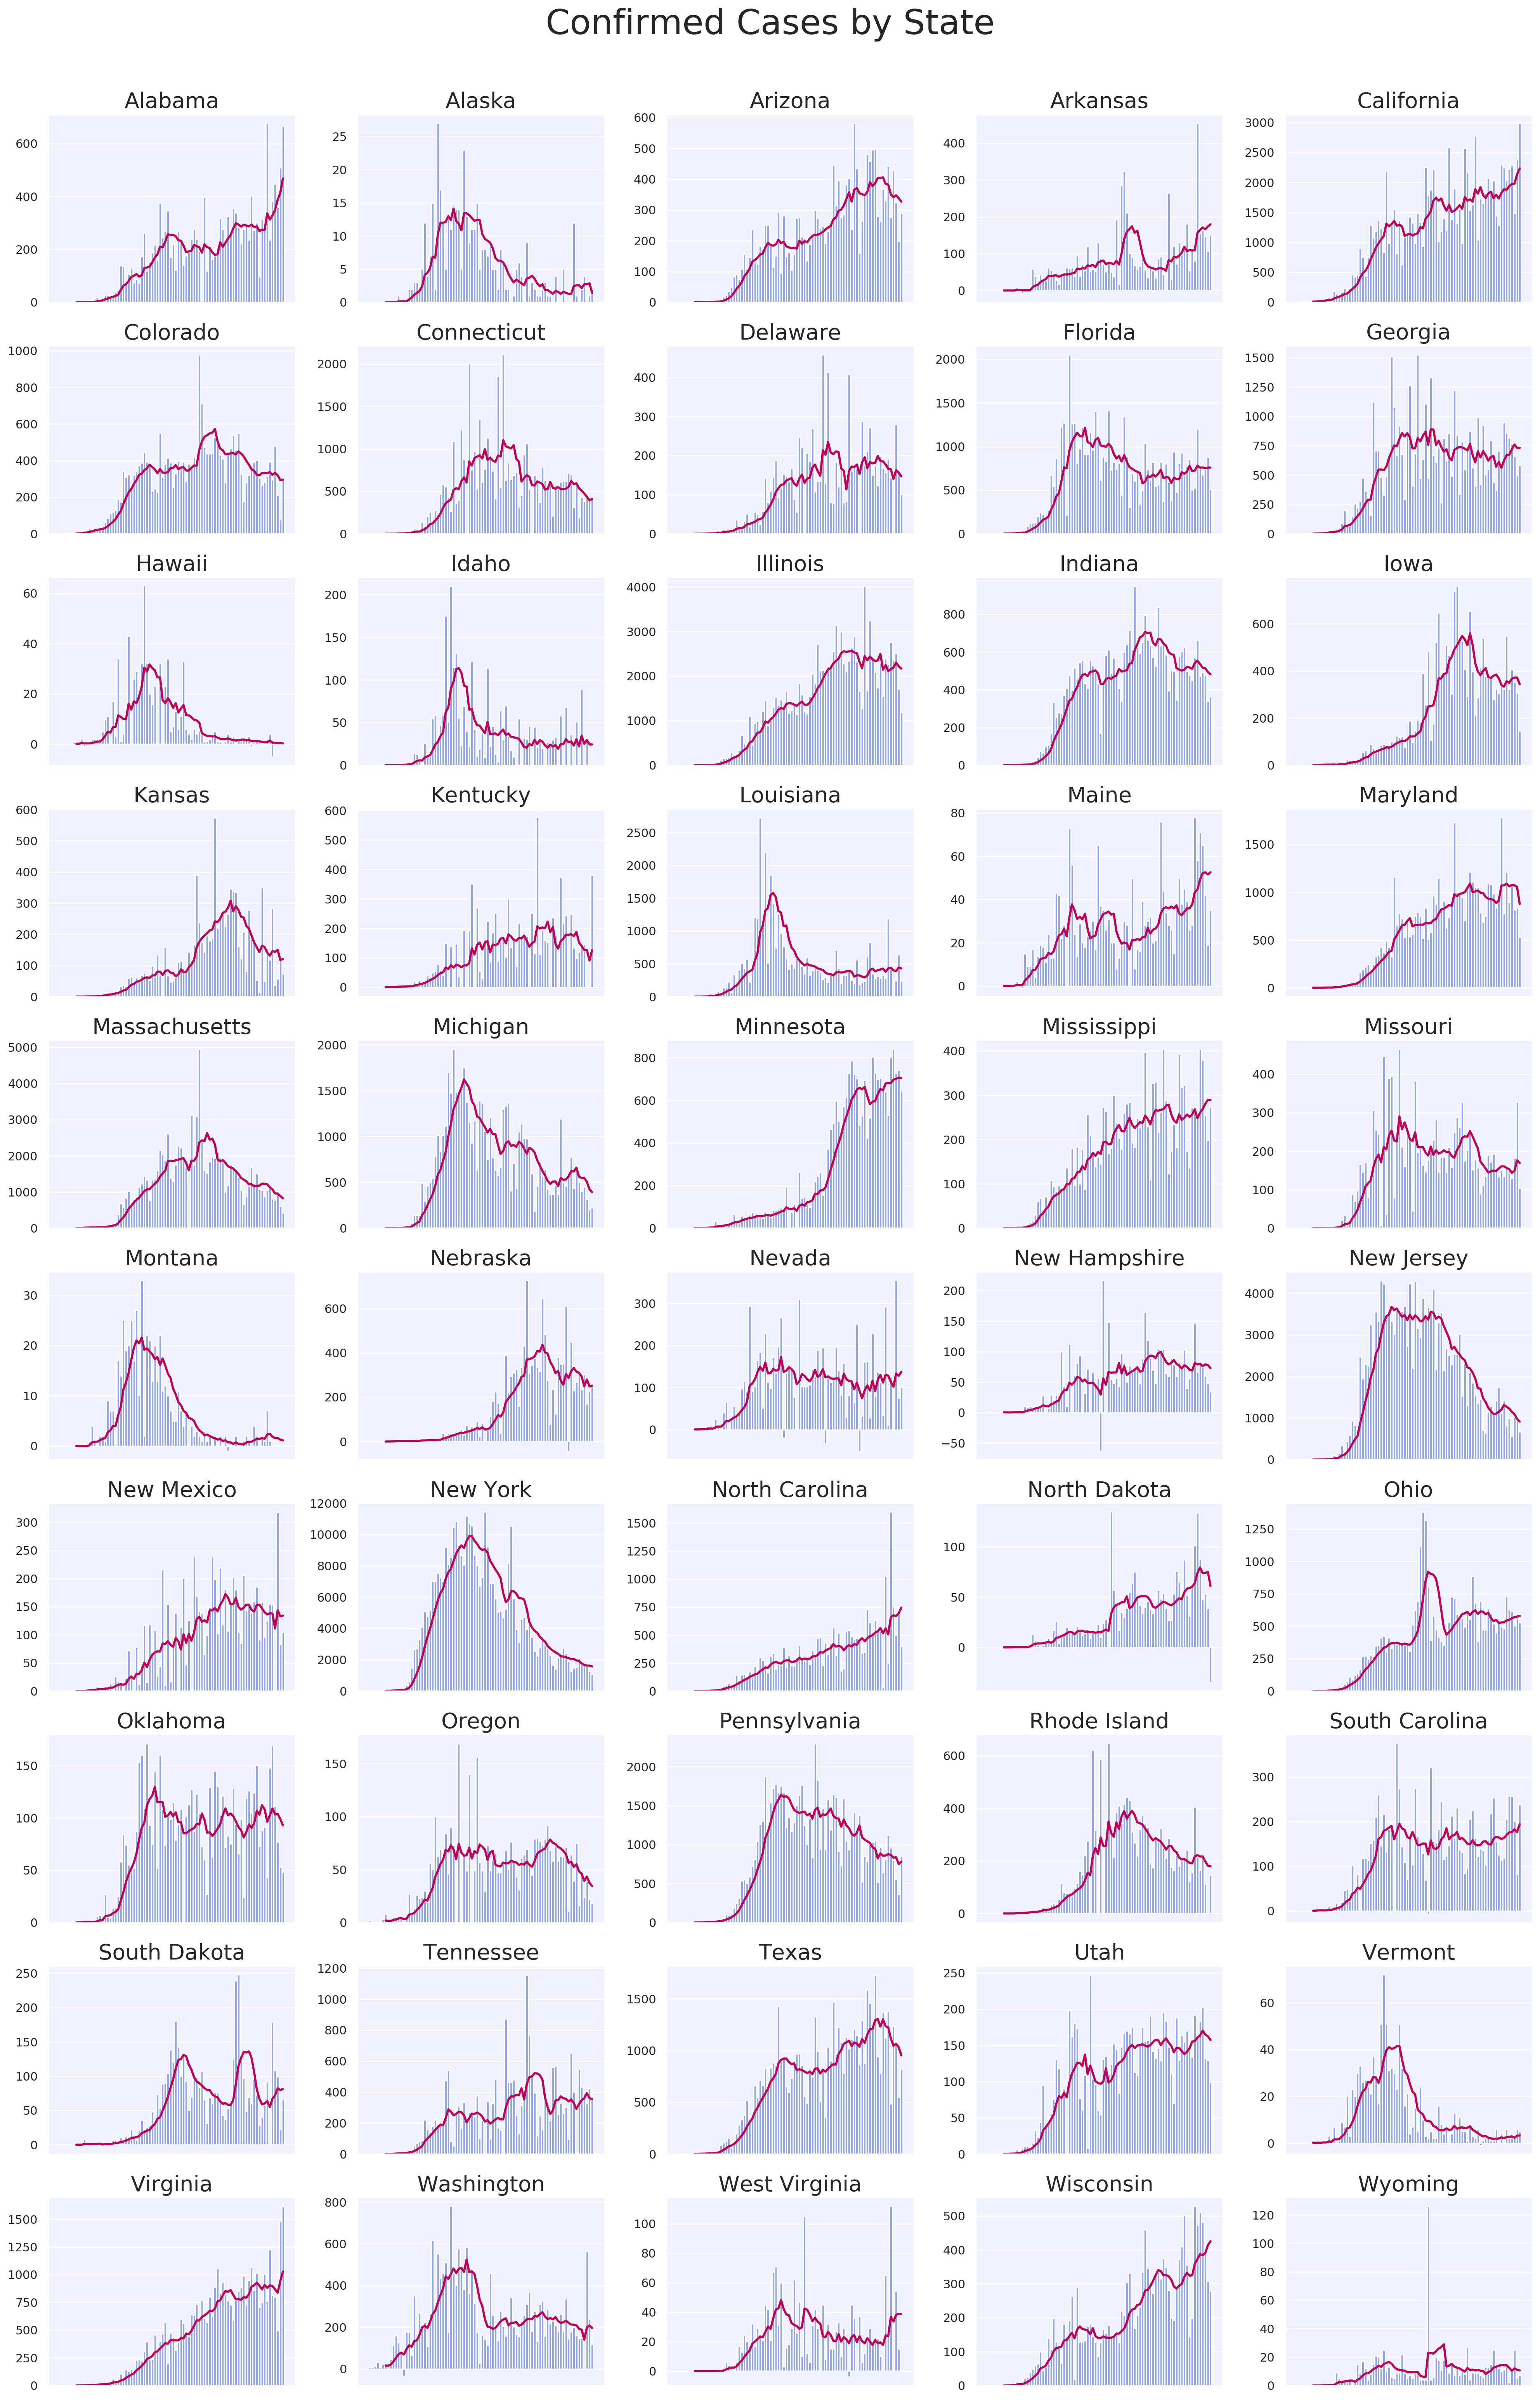

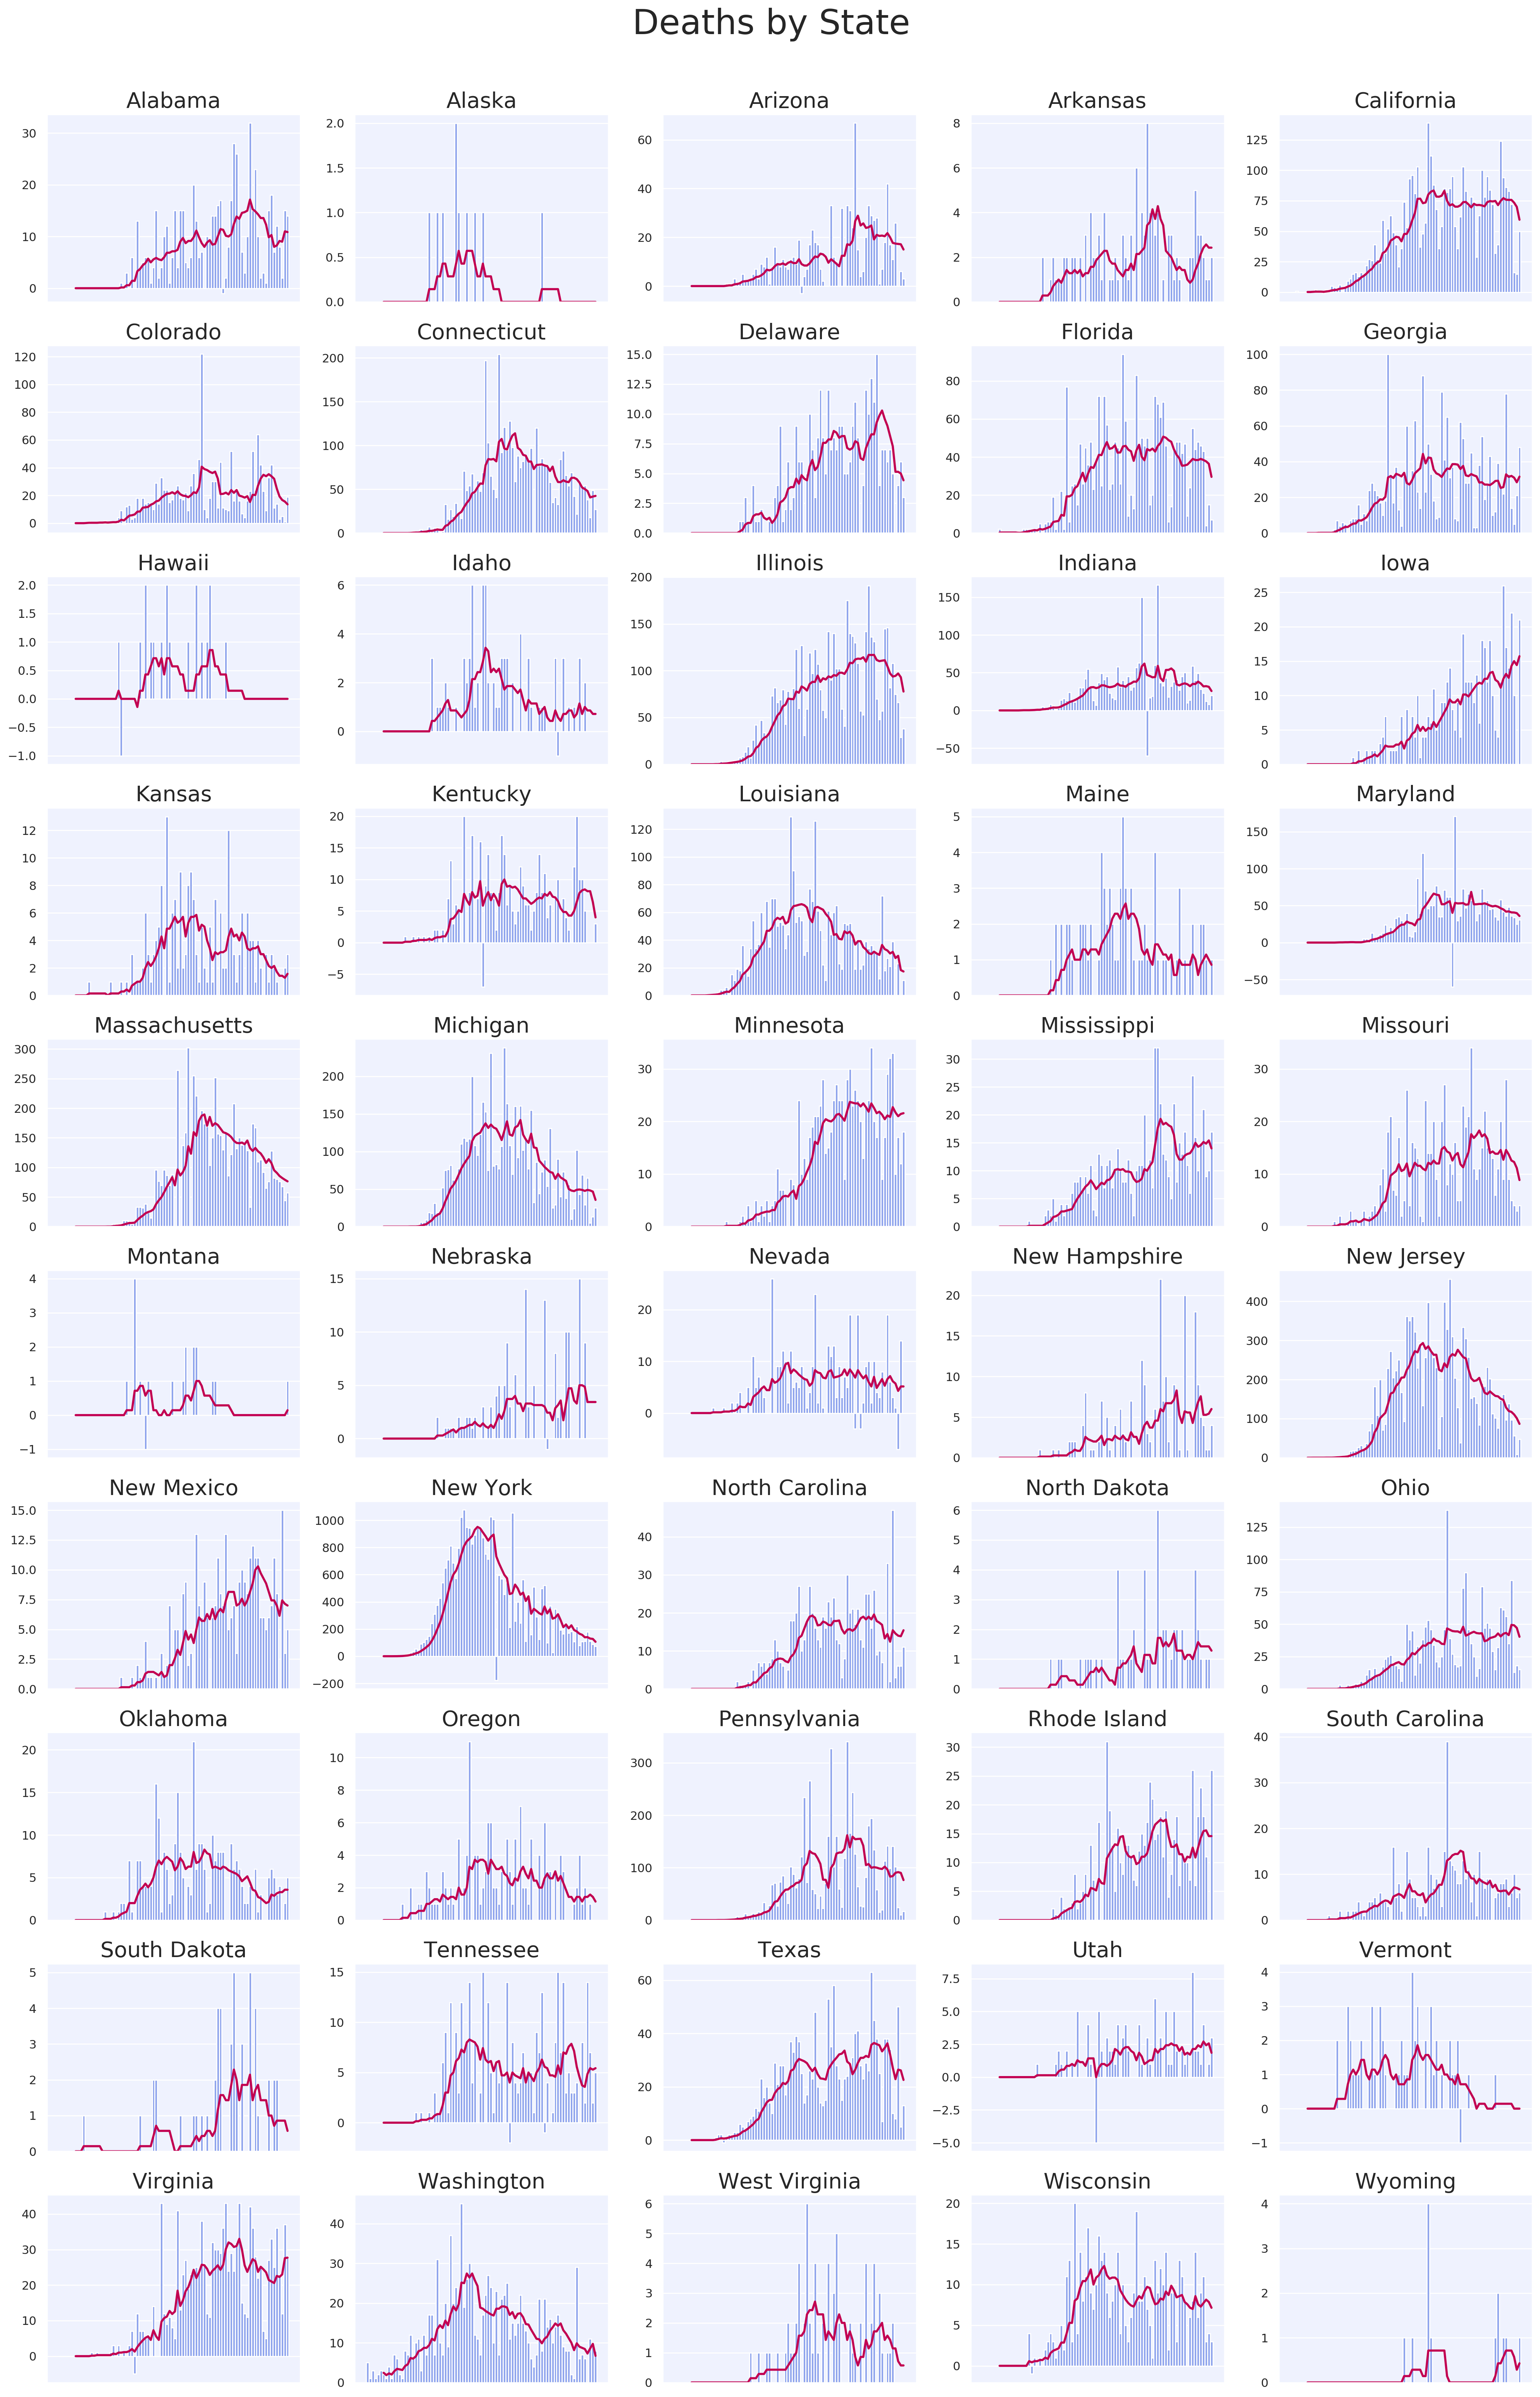

In [8]:
def counts_chart(counts, rolling_avg, title, file_name):
    '''Plot distribution of case counts and the rolling average'''
    
    # Fields of interest
    entity_field = 'Province_State'
    dates = list(counts.columns)
    dates.remove(entity_field)
    
    fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(20,30), dpi=200)
    fig.suptitle(title, fontsize=32, y=1.03) 
    
    for index, ax in enumerate(axes.flatten()):
        
        # Isolate country
        entity = counts.loc[index, entity_field]     
        
        # Plot parameters
        ax.set_facecolor('#EFF2FE')
        ax.tick_params(labelbottom=False)
        ax.xaxis.grid(False)
        ax.set_title(entity, fontsize=20)
        
        # Plot: Distribution of counts per day
        ax.bar(dates, counts.loc[index, dates], color='#90A5ED', alpha=1.0, width=1.0)
        
        # Plot: Rolling Average
        ax.plot(dates, rolling_avg.loc[index, dates], c='#C20051', alpha=1.0, linewidth=2.0)
        
    
    plt.tight_layout()
    directory = '../images/'
    plt.savefig(os.path.join(directory, file_name), bbox_inches='tight', dpi=200)
    plt.show()
        
counts_chart(
    daily_counts_confirmed, rolling_avg_confirmed,
    'Confirmed Cases by State',
    'usa_confirmed.png'
)
counts_chart(
    daily_counts_deaths, rolling_avg_deaths,
    'Deaths by State',
    'usa_deaths.png'
)